# Supermarket Sales Analysis

## Objective
The goal of this project is to analyze supermarket sales data to uncover trends in revenue, profit, and customer purchasing behavior.

## Key Business Questions
- Which product categories generate the most revenue and profit?
- How do sales change over time?
- Are there patterns by store, region, or day of week?
- Which factors contribute to higher or lower profitability?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


In [2]:
df = pd.read_csv('supermarket_sales.xls')
df.head()

,Invoice ID,City,Product line,Unit price,Quantity,Date,Payment,Rating
0,750-67-8428,Yangon,Health and beauty,74.69,7,1/5/19,Ewallet,9.1
1,226-31-3081,Naypyitaw,Electronic accessories,15.28,5,3/8/19,Cash,9.6
2,631-41-3108,Yangon,Home and lifestyle,46.33,7,3/3/19,Credit card,7.4
3,123-19-1176,Yangon,Health and beauty,58.22,8,1/27/19,Ewallet,8.4
4,373-73-7910,Yangon,Sports and travel,86.31,7,2/8/19,Ewallet,5.3


In [3]:
df.shape

(955, 8)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 0 to 954
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Invoice ID    955 non-null    object 
 1   City          955 non-null    object 
 2   Product line  955 non-null    object 
 3   Unit price    955 non-null    float64
 4   Quantity      955 non-null    int64  
 5   Date          955 non-null    object 
 6   Payment       955 non-null    object 
 7   Rating        955 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 59.8+ KB


In [5]:
df.describe()


,Unit price,Quantity,Rating
count,955.000000,955.000000,955.000000
mean,55.570513,5.522513,6.977173
std,26.445947,2.935410,1.714442
min,10.080000,1.000000,4.000000
25%,32.850000,3.000000,5.550000
50%,55.040000,5.000000,7.000000
75%,77.655000,8.000000,8.450000
max,99.960000,10.000000,10.000000


## Data Overview

The dataset contains transaction-level supermarket sales data.
Key fields include product information, sales values, and dates.
Initial inspection is used to identify missing values, data types, and potential outliers.


In [6]:
df.isna().sum()


Invoice ID      0
City            0
Product line    0
Unit price      0
Quantity        0
Date            0
Payment         0
Rating          0
dtype: int64

In [8]:
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")


## Date Parsing

The date column was explicitly parsed using a specified format to ensure consistent
date handling and avoid performance issues caused by automatic inference.
Invalid date values were coerced to null and handled during data cleaning.


In [10]:
df.duplicated().sum()
df = df.drop_duplicates


np.int64(0)

## Feature Engineering

New features are created to support time-based and performance analysis.


In [11]:
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month
df["day_of_week"] = df["Date"].dt.day_name()


In [12]:
df["profit"] = df["Unit price"] * df["Quantity"]
# In this project I will assume each transaction had a fixed cost of $1. This will give unrealistic profit margins but I wanted to include something.
fixed_cost = 1.00
df["revenue"] = df["profit"] - fixed_cost
df["profit_margin"] = df["profit"] / df["revenue"]


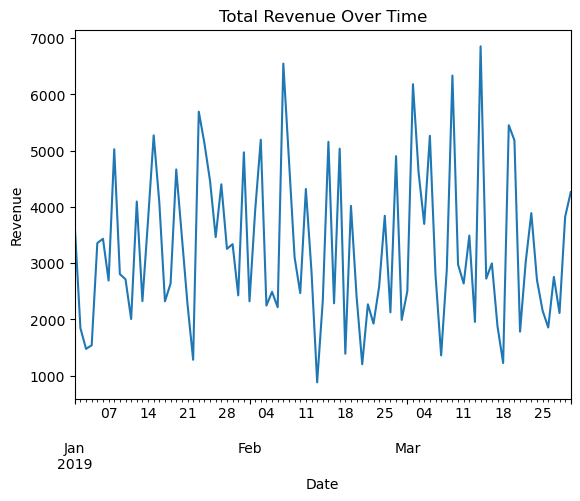

In [14]:
sales_over_time = df.groupby("Date")["revenue"].sum()

plt.figure()
sales_over_time.plot()
plt.title("Total Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()


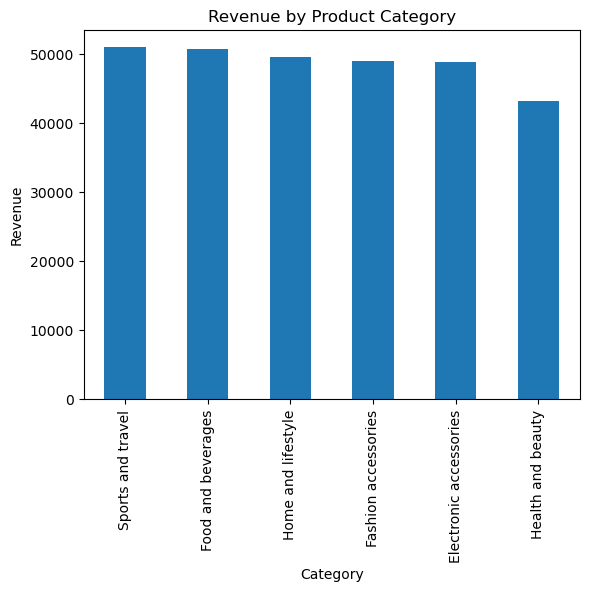

In [16]:
category_sales = df.groupby("Product line")["revenue"].sum().sort_values(ascending=False)

plt.figure()
category_sales.plot(kind="bar")
plt.title("Revenue by Product Category")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.show()


## Key Insights

- Product categories generate similar revenue, except for "health and beauty" which is a clear laggard.
- Sales show clear time-based trends, with peaks on specific days or months.
- Higher revenue transactions do not always result in higher profit.


In [19]:
df.to_csv("cleaned_sales_data.csv", index=False)


The cleaned dataset is exported for use in Power BI dashboards.
